In [18]:
import pandas as pd
import numpy as np
import healpy as hp
from DS_healpix_fragmentation import radec2pix, pix2radec, pix2pix
from matplotlib import pyplot as plt
from DS_models_stat import stat_orig_cats

In [19]:
nside = 2**11
small_nside = 2**7

In [3]:
print(len(pd.read_csv('/home/rt2122/Data/original_catalogs/csv/PSZ2.csv')))
print(len(pd.read_csv('/home/rt2122/Data/original_catalogs/csv/ACT.csv')))
print(len(pd.read_csv('/home/rt2122/Data/original_catalogs/csv/MCXC.csv')))
print(len(pd.read_csv('/home/rt2122/Data/original_catalogs/csv/Abell.csv')))
print(len(pd.read_csv('/home/rt2122/Data/original_catalogs/csv/RM.csv')))

1653
4195
1743
4076
26111


In [20]:
n_src = [1000, 4000, 25000]

In [21]:
cats_pix = []
cats_pixq = []
cats_radec = []
for n in n_src:
    cats_pix.append(np.random.randint(low=0, high=hp.nside2npix(nside), size=n))
    cats_pixq.append(pix2pix(cats_pix[-1], nside, small_nside))
    ra, dec = pix2radec(cats_pix[-1], nside)
    cats_radec.append(pd.DataFrame({'RA' : ra, 'DEC' : dec}))

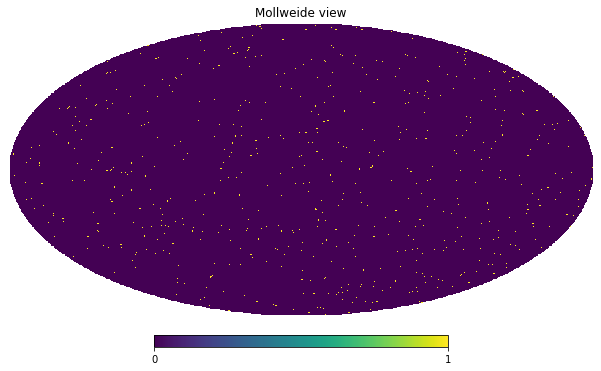

In [22]:
a = np.zeros(hp.nside2npix(small_nside))
a[cats_pixq[0]] = 1
hp.mollview(a, nest=True)

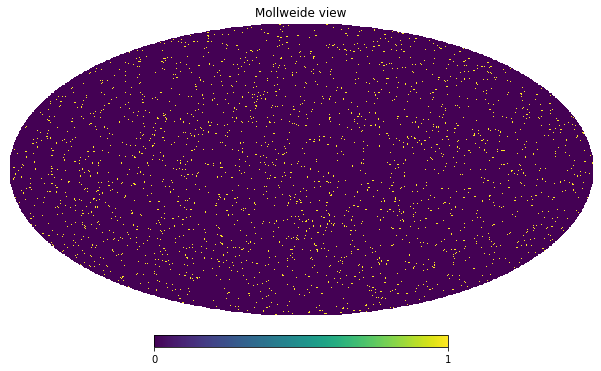

In [23]:
a = np.zeros(hp.nside2npix(small_nside))
a[cats_pixq[1]] = 1
hp.mollview(a, nest=True)

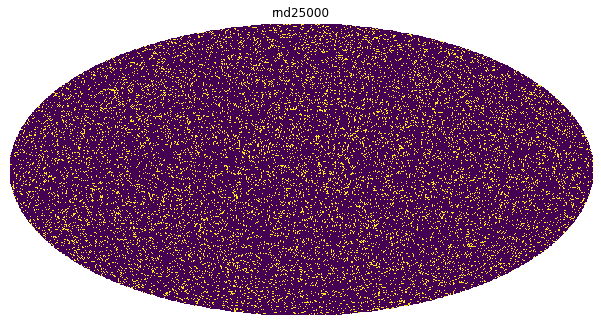

In [24]:
a = np.zeros(hp.nside2npix(small_nside))
a[cats_pixq[2]] = 1
hp.mollview(a, nest=True, title='rnd25000', cbar=False)

In [20]:
cats_radec[0]

,RA,DEC
0,218.443200,16.664029
1,227.221281,-28.027924
2,153.442221,35.021695
3,200.840895,22.135612
4,22.860144,-21.497857
...,...,...
995,94.231158,-54.311289
996,28.058594,2.814145
997,71.302304,-58.020732
998,34.917604,-11.004354


In [25]:
for cat, n in zip(cats_radec, n_src):
    cat.to_csv('/home/rt2122/Data/random_clusters/rnd{}_new.csv'.format(n), index=False)

In [14]:
def n_src2rad(ax, det_cat_file, true_cat_dir='/home/rt2122/Data/original_catalogs/csv/', rads=[0, 1600/3600, 100/3600], vline=400/3600, 
             cat='all'):
    n_src = []
    res_src = []
    for rad in np.arange(*rads):
        comp_df, recall_df = stat_orig_cats({'det_cat' : det_cat_file}, true_cat_dir, big_pix=list(range(48)), dict_cut={}, 
                                        recall_only=False, match_dist=rad, no_err=True)
        n_src.append(comp_df.loc['det_cat', cat])
        if len(n_src) > 1:
            res_src.append(n_src[-1] - n_src[-2])
        else:
            res_src.append(n_src[-1])
        
    ax.plot(3600 * np.arange(*rads), res_src/np.arange(*rads))
    ax.set_xlabel('radius, \'\'  ' + cat)
    ax.set_ylabel('n_src / radius')
    ax.grid()
    line = ax.axvline(3600 * vline, c='r')
    line.set_label(str(int(vline * 3600)) + ' \'\'')
    ax.legend()

/home/rt2122/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-14-2417e9290718>:14: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot(3600 * np.arange(*rads), res_src/np.arange(*rads))


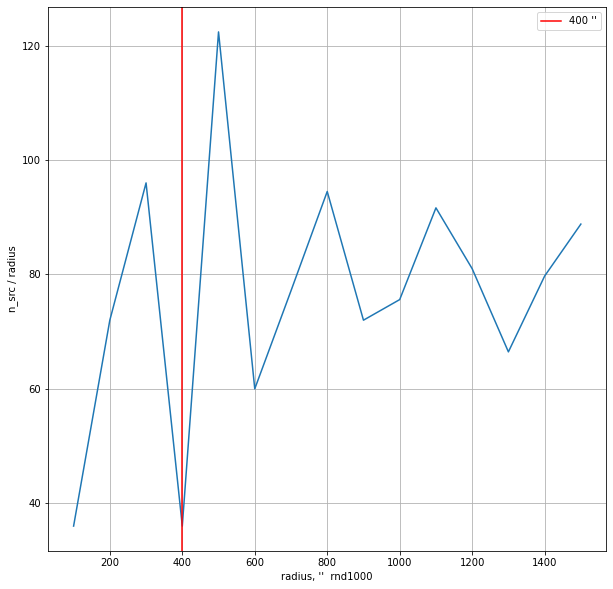

In [15]:
_, ax = plt.subplots(1, 1, figsize=(10, 10))
n_src2rad(ax, '/home/rt2122/Data/detected_cats/full_pz_all_found34_thr0.1_step8_no_fn.csv', cat='rnd1000', 
          rads=[0, 1500/3600, 100/3600], true_cat_dir='/home/rt2122/Data/random_clusters/')

/home/rt2122/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-14-2417e9290718>:14: RuntimeWarning: invalid value encountered in true_divide
  ax.plot(3600 * np.arange(*rads), res_src/np.arange(*rads))


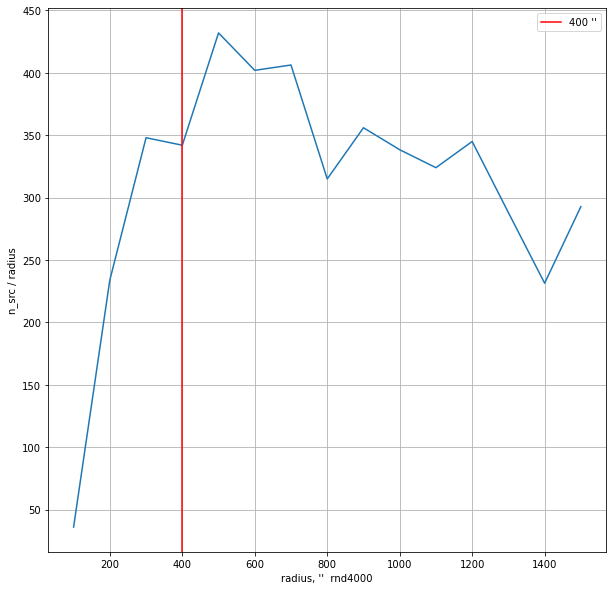

In [16]:
_, ax = plt.subplots(1, 1, figsize=(10, 10))
n_src2rad(ax, '/home/rt2122/Data/detected_cats/full_pz_all_found34_thr0.1_step8_no_fn.csv', cat='rnd4000', 
          rads=[0, 1500/3600, 100/3600], true_cat_dir='/home/rt2122/Data/random_clusters/')

/home/rt2122/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-14-2417e9290718>:14: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot(3600 * np.arange(*rads), res_src/np.arange(*rads))


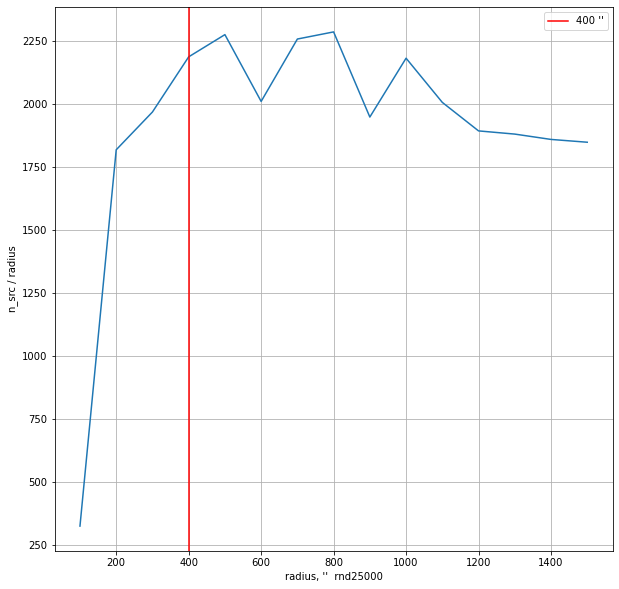

In [17]:
_, ax = plt.subplots(1, 1, figsize=(10, 10))
n_src2rad(ax, '/home/rt2122/Data/detected_cats/full_pz_all_found34_thr0.1_step8_no_fn.csv', cat='rnd25000', 
          rads=[0, 1500/3600, 100/3600], true_cat_dir='/home/rt2122/Data/random_clusters/')

/home/rt2122/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-14-2417e9290718>:14: RuntimeWarning: invalid value encountered in true_divide
  ax.plot(3600 * np.arange(*rads), res_src/np.arange(*rads))


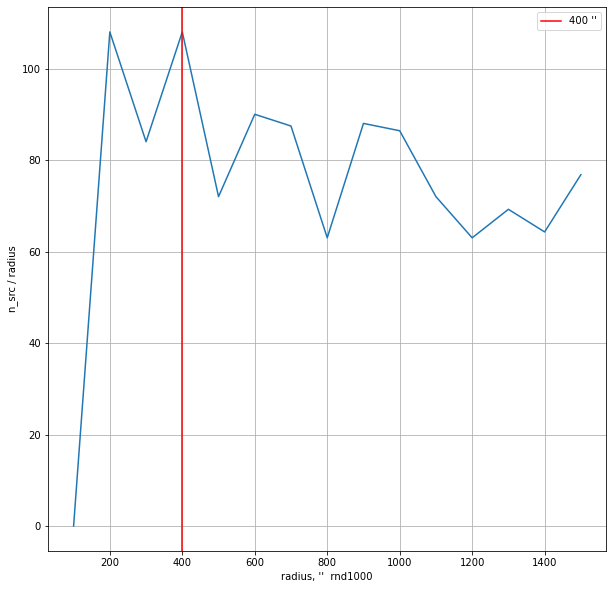

In [27]:
_, ax = plt.subplots(1, 1, figsize=(10, 10))
n_src2rad(ax, '/home/rt2122/Data/random_clusters/rnd25000_new.csv', cat='rnd1000', 
          rads=[0, 1500/3600, 100/3600], true_cat_dir='/home/rt2122/Data/random_clusters/')

/home/rt2122/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-14-2417e9290718>:14: RuntimeWarning: invalid value encountered in true_divide
  ax.plot(3600 * np.arange(*rads), res_src/np.arange(*rads))


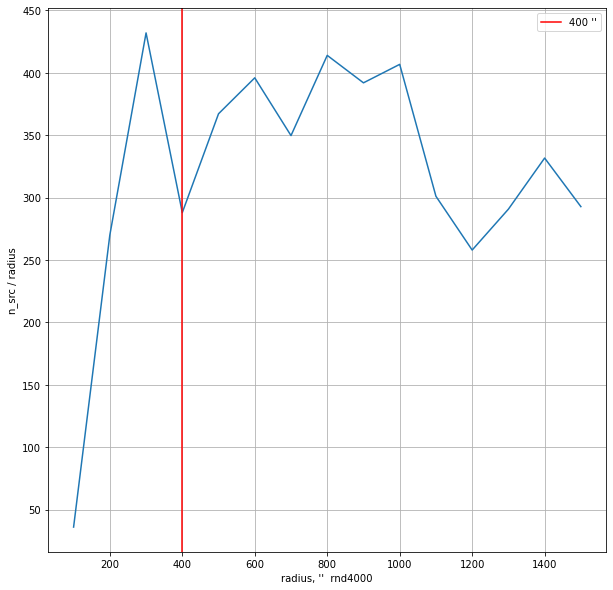

In [28]:
_, ax = plt.subplots(1, 1, figsize=(10, 10))
n_src2rad(ax, '/home/rt2122/Data/random_clusters/rnd25000_new.csv', cat='rnd4000', 
          rads=[0, 1500/3600, 100/3600], true_cat_dir='/home/rt2122/Data/random_clusters/')

/home/rt2122/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-14-2417e9290718>:14: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot(3600 * np.arange(*rads), res_src/np.arange(*rads))


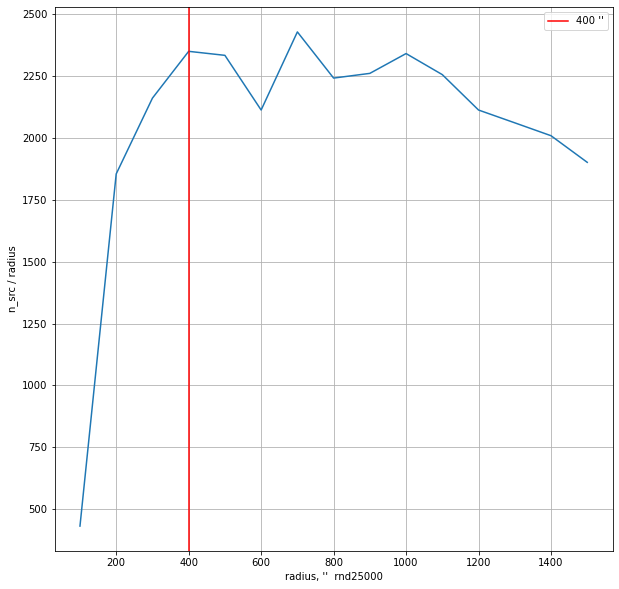

In [29]:
_, ax = plt.subplots(1, 1, figsize=(10, 10))
n_src2rad(ax, '/home/rt2122/Data/random_clusters/rnd25000_new.csv', cat='rnd25000', 
          rads=[0, 1500/3600, 100/3600], true_cat_dir='/home/rt2122/Data/random_clusters/')